# Potato Disease Classification with CNN
Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### 1. Setup and Constants

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np # Added for standard array operations
import os # Added for file path operations

# Constants defined in the original file
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

# Set path constants
DATA_DIR = "C:/Learn Programming/Machine Learning/potato_disease/data/PlantVillage"
SAVED_MODEL_PATH = "../saved_models/1/1"

### 2. Load Dataset and Inspect Classes

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

class_names = dataset.class_names
n_classes = len(class_names)

print(f"Class Names: {class_names}")
print(f"Total batches: {len(dataset)}")

Found 2152 files belonging to 3 classes.
Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Total batches: 68


### 3. Visualize and Split Data

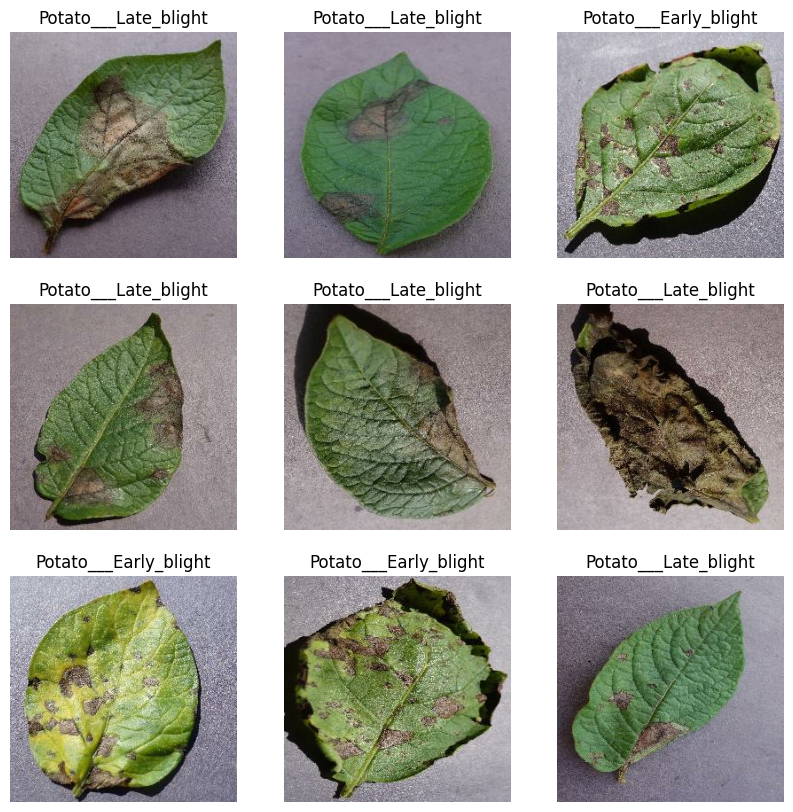

In [3]:
# Example Visualization (Improved structure for clarity)
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [4]:
# Data Partitioning Function (Cleaned up structure)
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    print(f"Total batches ({ds_size})")
    print(f"Train batches: {len(train_ds)}")
    print(f"Validation batches: {len(val_ds)}")
    print(f"Test batches: {len(test_ds)}")

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Caching and Prefetching for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Total batches (68)
Train batches: 54
Validation batches: 6
Test batches: 8


### 4. Model Definition and Training

In [5]:
def create_model():
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    
    # Data Augmentation Layers
    data_augmentation = models.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ])
    
    # CNN Model Architecture
    model = models.Sequential([
        data_augmentation,
        layers.Rescaling(1./255, input_shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    
    return model

model = create_model()
model.summary()

C:\Learn Programming\Machine Learning\potato_disease\myenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 535ms/step - accuracy: 0.6950 - loss: 0.7379 - val_accuracy: 0.7865 - val_loss: 0.6568
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - accuracy: 0.8669 - loss: 0.3367 - val_accuracy: 0.8594 - val_loss: 0.3838
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 496ms/step - accuracy: 0.8802 - loss: 0.2877 - val_accuracy: 0.8490 - val_loss: 0.3495
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 491ms/step - accuracy: 0.9201 - loss: 0.2052 - val_accuracy: 0.7604 - val_loss: 0.6072
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 499ms/step - accuracy: 0.9491 - loss: 0.1477 - val_accuracy: 0.8594 - val_loss: 0.3620
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 490ms/step - accuracy: 0.9340 - loss: 0.1785 - val_accuracy: 0.9167 - val_loss: 0.2290
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 494ms/step - accuracy: 0.9439 - loss: 0.1568 - val_accuracy: 0.8385 - val_loss: 0.4470
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.9514 - loss: 0.1328 - val_accu

### 5. Evaluate and Save Model

In [7]:
# Evaluate Model on Test Set
scores = model.evaluate(test_ds)
print(f"Test Loss: {scores[0]}\nTest Accuracy: {scores[1]}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9414 - loss: 0.1768
Test Loss: 0.17682184278964996
Test Accuracy: 0.94140625


In [12]:
# Original save logic (without checking for extension or using model.export)
os.makedirs(SAVED_MODEL_PATH, exist_ok=True)
model.export(SAVED_MODEL_PATH)
print(f"Model saved to {SAVED_MODEL_PATH}.")

INFO:tensorflow:Assets written to: ../saved_models/1/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1/1\assets


Saved artifact at '../saved_models/1/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2499127104080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127104464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127107536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127109072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127107728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127109456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127110224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127110416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127110032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127110800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2499127111184: TensorSpec(shape